# Pandas DataFrame Cheatsheet (Covered in this Notebook)

## 1. Creating DataFrames
- From lists: `pd.DataFrame(list_of_lists, columns=[...])`
- From dicts: `pd.DataFrame(dict_of_lists)` + `set_index('column')`

## 2. Reading Data
- `pd.read_csv('file.csv')` → Read CSV into DataFrame
- `head(n)` → Show first n rows
- `shape` → (rows, columns)
- `dtypes` → Data type of each column
- `info()` → Summary of DataFrame
- `describe()` → Descriptive statistics of numeric columns

## 3. Inspecting Data
- `index` → Row labels
- `columns` → Column names
- `values` → 2D NumPy array of data
- `isnull().sum()` → Count of missing values per column
- `duplicated().sum()` → Count of duplicate rows

## 4. Accessing Data
- Single column: `df['col']` → Series
- Multiple columns: `df[['col1','col2']]` → DataFrame
- Single row by index: `df.iloc[0]` → Series
- Multiple rows by slicing: `df.iloc[start:end:step]`
- Fancy indexing rows: `df.iloc[[0,3,6]]`
- Single row by label: `df.loc['label']`
- Multiple rows by labels: `df.loc['start_label':'end_label']`

## 5. Filtering Data
- Conditional filtering: `df[df['col']=='value']`
- Select specific columns after filtering: `df[df['col']=='value'][['col1','col2']]`

## 6. Modifying Data
- Add new column (constant): `df['new_col'] = value`
- Add new column from existing: `df['new_col'] = df['col'].operation()`
- Rename columns: `df.rename(columns={'old':'new'}, inplace=True)`
- Drop rows with NaN: `df.dropna(inplace=True)`

## 7. Data Type Conversion
- `astype(new_type)` → Change column type
  - Example: `int64 → int32`, `object → category`
- Category type → Efficient storage for repeated values


# Import Libraries


In [ ]:
import numpy as np
import pandas as pd

#Import Data

In [ ]:
batsman = pd.read_csv('batsman_runs_ipl.csv')

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
ipl = pd.read_csv('ipl-matches.csv')

In [ ]:
movies = pd.read_csv('movies.csv')

# Creating DataFrame

### DataFrame using Lists  
- Hum **list of lists** ka use karke DataFrame bana sakte hain.  
- Yaha `student` ek nested list hai → har inner list ek **row** represent karti hai.  
- `pd.DataFrame(student, columns=['IQ','Marks','Package'])`  
  - `student` → data  
  - `columns` → column names assign karne ke liye  
- print(type(student_data)) → yeh check karega ki `student_data` ka type kya hai.  
- Output: <class 'pandas.core.frame.DataFrame'> → matlab object ek **DataFrame** hai.  


In [ ]:
student=[
    [100,80,10],
    [90,70,7],
    [78,17,12]
]
student_data = pd.DataFrame(student,columns=['IQ','Marks','Package'])
print(type(student_data))

<class 'pandas.core.frame.DataFrame'>


## DataFrame using Dictionary  
- Hum **dictionary of lists** se bhi DataFrame bana sakte hain.  
- Dictionary me:  
  - **Keys** → column names  
  - **Values (lists)** → column ke data  

### Code Explanation  
- `student1 = { ... }` → dictionary create kiya jisme Name, IQ, Marks, Package diye gaye.  
- `pd.DataFrame(student1)` → dictionary ko DataFrame me convert kar diya.  
- `set_index('Name', inplace=True)`  
  - `set_index` se hum **'Name' column ko index** bana dete hain.  
  - `inplace=True` → changes directly DataFrame par apply honge (naya variable banane ki need nahi).  

In [ ]:
student1 = {
    'Name':['Suraj','Shivam','Ashish','Jay','Anurag','Soyab'],
    'IQ':[100,78,98,89,0,0],
    'Marks':[80,90,17,66,0,0],
    'Package':[10,7,12,6,0,0]
}
student_data1 = pd.DataFrame(student1)
student_data1.set_index('Name',inplace=True)
student_data1

,IQ,Marks,Package
Name,,,
Suraj,100,80,10
Shivam,78,90,7
Ashish,98,17,12
Jay,89,66,6
Anurag,0,0,0
Soyab,0,0,0


## Reading CSV File in Pandas  
- `pd.read_csv('movies.csv')`  
  - `read_csv` function CSV file ko read karke DataFrame me convert karta hai.  
  - `'movies.csv'` → file ka naam (same directory me hona chahiye).  

- `movies.head(2)`  
  - `head(n)` function → DataFrame ki **pehli n rows** show karta hai.  
  - Yaha `2` diya hai → matlab sirf **first 2 rows** display hongi.  

✅ Useful for quickly checking starting data of a dataset.


In [ ]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [ ]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


# DataFrame Attribute and Methods

> 💡 **Tip:** Dataset import ke baad in attributes/methods ka use hota hai.

### Shape Attribute in Pandas  
- `movies.shape`  
  - DataFrame ki **dimensions** (rows, columns) return karta hai.  
  - Output ek **tuple** hota hai → `(no_of_rows, no_of_columns)`  

In [ ]:
# shape
movies.shape

(1629, 18)

In [ ]:
ipl.shape     # total ipl matches is 950

(950, 20)

### Checking Data Types of Columns  

- `DataFrame.dtypes`  
  - Har column ka **data type** batata hai.  
  - Output me column names aur unke data types dikhenge.

In [ ]:
# dtypes
movies.dtypes
ipl.dtypes

,0
ID,int64
City,object
Date,object
Season,object
MatchNumber,object
Team1,object
Team2,object
Venue,object
TossWinner,object
TossDecision,object


### Index in Pandas  

- `DataFrame.index`  
  - DataFrame ke **row labels / indices** ko show karta hai.  
  - Default me **0 se start hone wale integers** hote hain agar custom index nahi diya gaya.  

In [ ]:
print("Movies Index: ",movies.index)
print("Ipl Index: ",ipl.index)

Movies Index:  RangeIndex(start=0, stop=1629, step=1)
Ipl Index:  RangeIndex(start=0, stop=950, step=1)


### Columns in Pandas  

- `DataFrame.columns`  
  - DataFrame ke **column names** ko show karta hai.  
  - Output me **Index object** me column names aate hain.  

In [ ]:
print("Movies Columns:")
print(movies.columns)

print("\nIPL Columns:")
print(ipl.columns)

Movies Columns:
Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

IPL Columns:
Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')


### Values in Pandas  

- `DataFrame.values`  
  - DataFrame ke **sirf values** (data) ko return karta hai **2-D NumPy array** ke form me.  
  - Row aur column labels **include nahi hote**.  

In [ ]:
student_data.values
ipl.values

array([[1312200, 'Ahmedabad', '2022-05-29', ...,
        "['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312199, 'Ahmedabad', '2022-05-27', ...,
        "['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312198, 'Kolkata', '2022-05-25', ...,
        "['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']",
        'J Madanagopal', 'MA Gough'],
       ...,
       [335984, 'Delhi', '2008-04-19', ...,
        "['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'MM Patel']",
        'Aleem Dar', 'GA Pratapkumar'],
    

In [ ]:
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [ ]:
ipl.tail(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [ ]:
ipl.sample()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
654,548356,Bangalore,2012-05-06,2012,50,Royal Challengers Bangalore,Deccan Chargers,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,5.0,NaN,AB de Villiers,"['TM Dilshan', 'CH Gayle', 'V Kohli', 'AUK Pat...","['DJ Harris', 'S Dhawan', 'CL White', 'KC Sang...",HDPK Dharmasena,BNJ Oxenford


### DataFrame Info in Pandas  

- `DataFrame.info()`  
  - Dataset ka **summary** provide karta hai.  
  - Useful to quickly understand **data structure** aur missing values.  

#### Output me kya dikhta hai:
- Number of **entries / rows**  
- Column names  
- Non-null values count per column  
- Data types (`int64`, `float64`, `object`)  
- Memory usage  

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

### Descriptive Statistics in Pandas  

- `DataFrame.describe()`  
  - Numerical columns ka **summary statistics** provide karta hai.  
  - Default me **count, mean, std, min, 25%, 50%, 75%, max** dikhta hai.  

In [ ]:
movies.describe()

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


In [ ]:
ipl.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


### Checking Missing Values in Pandas  

- `DataFrame.isnull()`  
  - DataFrame me **missing values (NaN)** ko `True/False` ke form me dikhata hai.  

- `DataFrame.isnull().sum()`  
  - Har column me **total missing values** count karta hai.  

In [ ]:
movies.isnull().sum()

,0
title_x,0
imdb_id,0
poster_path,103
wiki_link,0
title_y,0
original_title,0
is_adult,0
year_of_release,0
runtime,0
genres,0


### Checking Duplicate Rows in Pandas  

- `DataFrame.duplicated()`  
  - DataFrame me **duplicate rows** ko `True/False` ke form me return karta hai.  

- `DataFrame.duplicated().sum()`  
  - **Total duplicate rows** ka count return karta hai.  

In [ ]:
movies.duplicated().sum()

np.int64(0)

In [ ]:
student_data1

,IQ,Marks,Package
Name,,,
Suraj,100,80,10
Shivam,78,90,7
Ashish,98,17,12
Jay,89,66,6
Anurag,0,0,0
Soyab,0,0,0


In [ ]:
student_data1.duplicated().sum()

np.int64(1)

## Renaming Columns in Pandas  

- `DataFrame.rename()`  
  - Column ke **names ko change** karne ke liye use hota hai.  
  - Syntax: `DataFrame.rename(columns={'old_name':'new_name'}, inplace=False)`  
    - `inplace=False` → temporary change  
    - `inplace=True` → permanent change DataFrame me save ho jata hai  

In [ ]:
student_data1.rename(columns={'Marks':'Percent','Package':'LPA'},inplace=True)
student_data1

,IQ,Percent,LPA
Name,,,
Suraj,100,80,10
Shivam,78,90,7
Ashish,98,17,12
Jay,89,66,6
Anurag,0,0,0
Soyab,0,0,0


# Math Methods

### 📊 Pandas Functions with `axis` Argument

#### **1. `sum -> min -> max -> std -> var`**
- **axis=0** → Har column ka total nikalta hai  
- **axis=1** → Har row ka total nikalta hai  



In [ ]:
student_data1

,IQ,Percent,LPA
Name,,,
Suraj,100,80,10
Shivam,78,90,7
Ashish,98,17,12
Jay,89,66,6
Anurag,0,0,0
Soyab,0,0,0


In [ ]:
print(student_data1.sum())
# or
print(student_data1.sum(axis=1))

IQ         365
Percent    253
LPA         35
dtype: int64
Name
Suraj     190
Shivam    175
Ashish    127
Jay       161
Anurag      0
Soyab       0
dtype: int64


>Mean

In [ ]:
# column wise mean
student_data1.mean()

,0
IQ,60.833333
Percent,42.166667
LPA,5.833333


In [ ]:
# row wise mean
student_data1.mean(axis=1)

,0
Name,
Suraj,63.333333
Shivam,58.333333
Ashish,42.333333
Jay,53.666667
Anurag,0.000000
Soyab,0.000000


In [ ]:
student_data1.min()

,0
IQ,0
Percent,0
LPA,0


In [ ]:
student_data1.max(axis=1)

,0
Name,
Suraj,100
Shivam,90
Ashish,98
Jay,89
Anurag,0
Soyab,0


# Selecting cols from a DataFrame

#### Accessing Single Column in Pandas  

- `DataFrame['column_name']`  
  - DataFrame ka **specific column** access karne ke liye use hota hai.  
  - Output me **Series** type me column ka data milega.

In [ ]:
movies['title_x']

,title_x
0,Uri: The Surgical Strike
1,Battalion 609
2,The Accidental Prime Minister (film)
3,Why Cheat India
4,Evening Shadows
...,...
1624,Tera Mera Saath Rahen
1625,Yeh Zindagi Ka Safar
1626,Sabse Bada Sukh
1627,Daaka


In [ ]:
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [ ]:
ipl['Venue']

,Venue
0,"Narendra Modi Stadium, Ahmedabad"
1,"Narendra Modi Stadium, Ahmedabad"
2,"Eden Gardens, Kolkata"
3,"Eden Gardens, Kolkata"
4,"Wankhede Stadium, Mumbai"
...,...
945,Eden Gardens
946,Wankhede Stadium
947,Feroz Shah Kotla
948,"Punjab Cricket Association Stadium, Mohali"


### Accessing Multiple Columns in Pandas  

- `DataFrame[[col1, col2, ...]]`  
  - Ek se zyada columns ko **ek saath access** karne ke liye double square brackets `[[ ]]` use hoti hain.  
  - Output me **DataFrame** return hota hai, na ki Series.  

In [ ]:
movies[['title_x','year_of_release','actors']]

,title_x,year_of_release,actors
0,Uri: The Surgical Strike,2019,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,Battalion 609,2019,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,The Accidental Prime Minister (film),2019,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,Why Cheat India,2019,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,Evening Shadows,2018,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...
...,...,...,...
1624,Tera Mera Saath Rahen,2001,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...
1625,Yeh Zindagi Ka Safar,2001,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...
1626,Sabse Bada Sukh,2018,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...
1627,Daaka,2019,Gippy Grewal|Zareen Khan|


In [ ]:
ipl[['Team1','Team2','WinningTeam']]

,Team1,Team2,WinningTeam
0,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore
3,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings,Punjab Kings
...,...,...,...
945,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
946,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
947,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
948,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings


# Selecting rows from a DataFrame

`iloc[start:end]`  
  - (last wala index se ek pehle tak ka value aata hai)
  - iloc-searches using index positions

`loc[start:end]`
  - (last wala index bhi include hota hai)
  - loc - searches using index labels

💡 **Note:**

1. **`iloc`** → Works on **index positions**  
   - Index positions hamesha available hote hain.

2. **`loc`** → Works on **index labels**  
   - Index labels hamesha available nahi hote, ye hum khud provide karte hain.  
   - Default index ke saath bhi kaam kar sakta hai.

### Accessing Single Row in Pandas  

- `DataFrame.iloc[row_index]`  
  - Row ko **index number** ke through access karta hai.  
  - Output me row ka **Series** type data milega, jisme **column names as index** honge.  

In [ ]:
movies.iloc[0]

,0
title_x,Uri: The Surgical Strike
imdb_id,tt8291224
poster_path,https://upload.wikimedia.org/wikipedia/en/thum...
wiki_link,https://en.wikipedia.org/wiki/Uri:_The_Surgica...
title_y,Uri: The Surgical Strike
original_title,Uri: The Surgical Strike
is_adult,0
year_of_release,2019
runtime,138
genres,Action|Drama|War


## Accessing Multiple Rows in Pandas  

- `DataFrame.iloc[start:end:step]`  
  - Row ko **index ke through slice** karne ke liye use hota hai.  
  - `start` → starting row index (inclusive)  
  - `end` → ending row index (exclusive)  
  - `step` → kitne step ke gap me rows pick karni hain (optional)  

In [ ]:
movies.iloc[5:13]      # Rows 5 se 12 tak
movies.iloc[:10]       # First 10 rows (0 se 9)
movies.iloc[5:]        # Rows 5 se last row tak
movies.iloc[5:100:2]   # Rows 5 se 99 tak, 2 step gap
movies.iloc[:100:3]    # First 100 rows, every 3rd row
movies.iloc[0:5]       # Rows 0 se 4

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


### Fancy Indexing in Pandas  

- `DataFrame.iloc[[row1, row2, ...]]`  
  - Specific rows ko **list of indices** ke through access karne ke liye use hota hai.  
  - Output me **DataFrame** return hota hai, na ki Series.  

In [ ]:
movies.iloc[[0,3,6]]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
6,Fraud Saiyaan,tt5013008,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Fraud_Saiyaan,Fraud Saiyaan,Fraud Saiyyan,0,2019,109,Comedy|Drama,4.2,504,Fraud Saiyyan is the story of a con artist in ...,Fraud Saiyyan is the story of a con artist in ...,NaN,Arshad Warsi|Saurabh Shukla|Flora Saini|Sara L...,NaN,18 January 2019 (India)


## Accessing Single Row using `loc`  

- `DataFrame.loc[row_label]`  
  - Row ko **index label ke through** access karta hai.  
  - Output me row ka **Series** type data milega, jisme **column names as index** honge.

In [ ]:
student_data1

,IQ,Percent,LPA
Name,,,
Suraj,100,80,10
Shivam,78,90,7
Ashish,98,17,12
Jay,89,66,6
Anurag,0,0,0
Soyab,0,0,0


In [ ]:
student_data1.loc['Suraj']

,Suraj
IQ,100
Percent,80
LPA,10


### Accessing Multiple Rows using `loc`  

- `DataFrame.loc[start_label:end_label]`  
  - Row ko **index labels ke range** se access karta hai.  
  - **Inclusive of both start and end labels** (Python slicing ke opposite).  
  - Output me **DataFrame** return hota hai.
  - isme last wala bhi print hota hai

In [ ]:
student_data1.loc['Suraj':'Anurag']

,IQ,Percent,LPA
Name,,,
Suraj,100,80,10
Shivam,78,90,7
Ashish,98,17,12
Jay,89,66,6
Anurag,0,0,0


In [ ]:
# print value according your choice
student_data1.loc[['Suraj','Jay','Ashish']]

,IQ,Percent,LPA
Name,,,
Suraj,100,80,10
Jay,89,66,6
Ashish,98,17,12


In [ ]:
# extra code...

# Selecting both rows and cols

In [ ]:
# print 3 rows or 4 columns using iloc
movies.iloc[0:3,0:4]

,title_x,imdb_id,poster_path,wiki_link
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...


In [ ]:
# print 4 rows or 4 columns using loc
movies.loc[0:3,'title_x':'wiki_link']

,title_x,imdb_id,poster_path,wiki_link
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India


# Filtering a DataFrame

In [ ]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [ ]:
# find all the final winners
final = ipl['MatchNumber']=='Final'
new_df = ipl[final]
new_df[['Season','WinningTeam']]

# one line code ->>
ipl[ipl['MatchNumber']=='Final'][['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [ ]:
# how many super over finishes have occured
ipl[ipl['SuperOver']=='Y'].shape[0]

14

In [ ]:
ipl.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
530,733973,Mumbai,2014-05-03,2014,22,Mumbai Indians,Kings XI Punjab,Wankhede Stadium,Kings XI Punjab,bat,N,Mumbai Indians,Wickets,5.0,NaN,CJ Anderson,"['BR Dunk', 'CM Gautam', 'AT Rayudu', 'RG Shar...","['CA Pujara', 'V Sehwag', 'WP Saha', 'GJ Maxwe...",BNJ Oxenford,C Shamshuddin
82,1254095,Abu Dhabi,2021-10-06,2021,52,Sunrisers Hyderabad,Royal Challengers Bangalore,"Zayed Cricket Stadium, Abu Dhabi",Royal Challengers Bangalore,field,N,Sunrisers Hyderabad,Runs,4.0,NaN,KS Williamson,"['JJ Roy', 'Abhishek Sharma', 'KS Williamson',...","['V Kohli', 'D Padikkal', 'DT Christian', 'KS ...",S Ravi,UV Gandhe


In [ ]:
# how many matches has csk won in kolkata
ipl[(ipl['City']=='Kolkata') & (ipl['WinningTeam']=='Chennai Super Kings')]

# ipl[ipl['City']=='Kolkata']
# ipl[ipl['WinningTeam']=='Chennai Super Kings']

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
224,1178404,Kolkata,2019-04-14,2019,29,Kolkata Knight Riders,Chennai Super Kings,Eden Gardens,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,5.0,NaN,Imran Tahir,"['CA Lynn', 'SP Narine', 'N Rana', 'RV Uthappa...","['SR Watson', 'F du Plessis', 'SK Raina', 'AT ...",CK Nandan,RJ Tucker
602,598022,Kolkata,2013-04-20,2013,26,Kolkata Knight Riders,Chennai Super Kings,Eden Gardens,Kolkata Knight Riders,bat,N,Chennai Super Kings,Wickets,4.0,NaN,RA Jadeja,"['G Gambhir', 'YK Pathan', 'JH Kallis', 'EJG M...","['MEK Hussey', 'R Ashwin', 'M Vijay', 'SK Rain...",Asad Rauf,AK Chaudhary
641,548368,Kolkata,2012-05-14,2012,63,Kolkata Knight Riders,Chennai Super Kings,Eden Gardens,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,5.0,NaN,MEK Hussey,"['G Gambhir', 'BB McCullum', 'JH Kallis', 'MK ...","['MEK Hussey', 'M Vijay', 'SK Raina', 'F du Pl...",JD Cloete,SJA Taufel
827,419113,Kolkata,2010-03-16,2009/10,8,Kolkata Knight Riders,Chennai Super Kings,Eden Gardens,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,55.0,NaN,MS Dhoni,"['BJ Hodge', 'MK Tiwary', 'SC Ganguly', 'WP Sa...","['M Vijay', 'ML Hayden', 'SK Raina', 'S Badrin...",HDPK Dharmasena,AM Saheba
908,336025,Kolkata,2008-05-18,2007/08,41,Kolkata Knight Riders,Chennai Super Kings,Eden Gardens,Kolkata Knight Riders,bat,N,Chennai Super Kings,Runs,3.0,D/L,M Ntini,"['Salman Butt', 'Mohammad Hafeez', 'SC Ganguly...","['PA Patel', 'SP Fleming', 'S Vidyut', 'SK Rai...",Asad Rauf,K Hariharan


In [ ]:
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [ ]:
# toss winner is match winner in percentage
winner_percentage = ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]
winner_percentage

489

In [ ]:
winner_percentage/ipl.shape[0]*100

51.473684210526315

In [ ]:
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [ ]:
# movies with rating higher than 8 and votes > 10,000
movies[(movies['imdb_rating'] > 8) & (movies['imdb_votes'] > 10000)]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA)
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
40,Super 30 (film),tt7485048,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Super_30_(film),Super 30,Super 30,0,2019,154,Biography|Drama,8.2,13972,Anand Kumar a Mathematics genius from a modes...,Based on life of Patna-based mathematician Ana...,Inspired by the Life of Anand Kumar & His Stud...,Hrithik Roshan|Mrunal Thakur|Nandish Singh|Vir...,NaN,12 July 2019 (USA)
143,Tumbbad,tt8239946,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Tumbbad,Tumbbad,Tumbbad,0,2018,104,Drama|Fantasy|Horror,8.2,16535,Set in Tumbbad in the 1920s the story revolve...,A mythological story about a goddess who creat...,NaN,Sohum Shah|Jyoti Malshe|Anita Date|Ronjini Cha...,9 wins & 12 nominations,12 October 2018 (India)
146,Andhadhun,tt8108198,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Andhadhun,Andhadhun,Andhadhun,0,2018,139,Crime|Thriller,8.4,51615,Akash a blind pianist is preparing for a Londo...,A series of mysterious events changes the life...,NaN,Ayushmann Khurrana|Tabu|Radhika Apte|Anil Dhaw...,24 wins & 25 nominations,5 October 2018 (USA)
325,Pink (2016 film),tt5571734,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Pink_(2016_film),Pink,Pink,0,2016,136,Drama|Thriller,8.2,33902,Deepak is a lawyer suffering from bipolar diso...,When three young women are implicated in a cri...,NaN,Taapsee Pannu|Amitabh Bachchan|Kirti Kulhari|A...,12 wins & 14 nominations,16 September 2016 (USA)
354,Dangal (film),tt5074352,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Dangal_(film),Dangal,Dangal,0,2016,161,Action|Biography|Drama,8.4,131338,Biopic of Mahavir Singh Phogat who taught wre...,Former wrestler Mahavir Singh Phogat and his t...,You think our girls are any lesser than boys?,Aamir Khan|Fatima Sana Shaikh|Sanya Malhotra|S...,23 wins & 4 nominations,21 December 2016 (USA)
418,Masaan,tt4635372,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Fly_Away_Solo,Masaan,Masaan,0,2015,109,Drama,8.1,19904,Four lives intersect along the Ganges: a low c...,Four lives intersect along the Ganges: a low c...,Paths of grieve intersect on the Ganges River.,Richa Chadha|Sanjay Mishra|Vicky Kaushal|Panka...,20 wins & 5 nominations,24 July 2015 (India)
426,Drishyam (2015 film),tt4430212,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Drishyam(2015),Drishyam,Drishyam,0,2015,163,Crime|Drama|Mystery,8.2,58340,Vijay Salgaonkar runs a cable TV network in a ...,Desperate measures are taken by a man who trie...,R

In [ ]:
# how many movies
movies[(movies['imdb_rating'] > 8) & (movies['imdb_votes'] > 10000)].shape[0]

43

In [ ]:
# Action movies with rating than 7.5
movies[(movies['genres'] == 'Action') & (movies['imdb_rating'] < 7.5)].shape[0]

15

In [ ]:
# mask1=movies['genres'].str.split('|').apply(lambda x:'Action' in x)
# or
mask1=movies['genres'].str.contains('Action')
mask2=movies['imdb_rating'] > 7.5

movies[mask1 & mask2].shape[0]

33

In [ ]:
#movies[mask1 & mask2]

In [ ]:
# write a function that can return the track record of 2 teams against each other


# Adding new cols

#### Adding a New Column in Pandas  

- `DataFrame['new_column'] = value`  
  - DataFrame me **naya column** add karne ke liye use hota hai.  
  - Sabhi rows me **same value** assign karna ho to ek value de sakte hain.

In [ ]:
movies['country']='India'
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India


#### Creating New Column from Existing Column  

- `DataFrame['new_column'] = DataFrame['existing_column'].operation()`  
  - Existing column ke data ko **manipulate karke** naya column create kar sakte hain.  

In [ ]:
movies['lead_actors']=movies['actors'].str.split('|').str[0]
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country,lead_actors
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India,Vicky Kaushal


## Removing Missing Values in Pandas  

- `DataFrame.dropna()`  
  - DataFrame me se **NaN / missing values** wali rows remove karta hai.  
  - `inplace=True` → changes **directly DataFrame me save** ho jate hain.

In [ ]:
movies.dropna(inplace=True)

In [ ]:
# five actor value are missing from movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 11 to 1623
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           298 non-null    object 
 1   imdb_id           298 non-null    object 
 2   poster_path       298 non-null    object 
 3   wiki_link         298 non-null    object 
 4   title_y           298 non-null    object 
 5   original_title    298 non-null    object 
 6   is_adult          298 non-null    int64  
 7   year_of_release   298 non-null    int64  
 8   runtime           298 non-null    object 
 9   genres            298 non-null    object 
 10  imdb_rating       298 non-null    float64
 11  imdb_votes        298 non-null    int64  
 12  story             298 non-null    object 
 13  summary           298 non-null    object 
 14  tagline           298 non-null    object 
 15  actors            298 non-null    object 
 16  wins_nominations  298 non-null    object 
 17  

In [ ]:
# from existing ones
movies['actors'].str.split('|').apply(lambda x:x[0])
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country,lead_actors
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA),India,Ranveer Singh


# Important DataFrame Functions

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

## Changing Data Type in Pandas  

- `DataFrame['column'].astype(new_type)`  
  - Column ke **data type** ko change karne ke liye use hota hai.  
  - Example: `int64` → `int32` ya `float64` → `int` etc.  

In [ ]:
ipl['ID']=ipl['ID'].astype('int32')

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int32  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

## Converting Columns to Category in Pandas  

- `DataFrame['column'].astype('category')`  
  - Column ke **data type ko category** me convert karta hai.  
  - Category type ka use **repeated values** aur **memory optimization** ke liye hota hai.  

### Example:
```python
# Convert columns to category
ipl['Season'] = ipl['Season'].astype('category')
ipl['Team1']  = ipl['Team1'].astype('category')
ipl['Team2']  = ipl['Team2'].astype('category')


In [ ]:
ipl['Season'] = ipl['Season'].astype('category')
ipl['Team1'] = ipl['Team1'].astype('category')
ipl['Team2'] = ipl['Team2'].astype('category')
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    category
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    category
 6   Team2            950 non-null    category
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    object  
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

In [ ]:
# find which player has won most potm -> in finals and qulifiers
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


In [ ]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


<Axes: ylabel='count'>

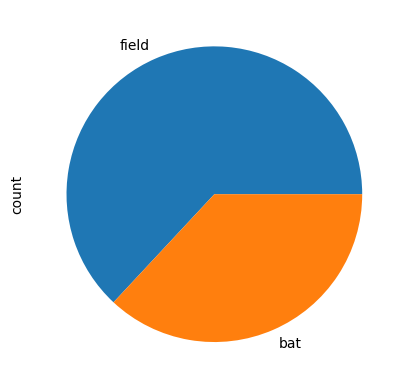

In [ ]:
# Toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
# how many matches each team has played
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63
